In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
plt.rcParams['axes.unicode_minus'] = False 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 05. population_raw_data.xlsx to 05. population_raw_data.xlsx


# 05.population using korea Map

In [0]:
import pandas as pd
import numpy as np

population = pd.read_excel('05. population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace=True)
population

## 원래 갖고 있던 컬럼 이름이 너무 길어서 이름을 바꿈↓

In [0]:
population.rename(columns={'행정구역(동읍면)별(1)':'광역시도',
                           '행정구역(동읍면)별(2)':'시도',
                           '계':'인구수'}, inplace=True)
population

## 소계 data는 빼고 갖고 오겠다는 의미 ↓

In [0]:
population = population[(population['시도'] != '소계')]    
population

In [0]:
population.rename(columns={'항목':'구분'}, inplace=True)

population.loc[population['구분'] == '총인구수 (명)','구분'] ='합계'
population.loc[population['구분'] == '남자인구수 (명)','구분'] ='남자'
population.loc[population['구분'] == '여자인구수 (명)','구분'] ='여자'

population

## 나이대를 합침

In [24]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']

population['65세 이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                          population['75 - 79세'] + population['80 - 84세'] + \
                          population['85 - 89세'] + population['90 - 94세'] + \
                          population['95 - 99세'] + population['100+']
population['65세이상']=population.iloc[:,8:16].sum(axis=1)
population.head(10)  

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세 이상,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0,39140.0


In [13]:
pop = pd.pivot_table(population,
                     index = ['광역시도', '시도'],
                     columns = ['구분'],
                     values = ['인구수', '20-39세','65세 이상'])
pop

20-39세                      ...       인구수                    
구분              남자        여자        합계  ...        남자        여자        합계
광역시도 시도                                 ...                              
강원도  강릉시   26286.0   23098.0   49384.0  ...  106231.0  107615.0  213846.0
     고성군    4494.0    2529.0    7023.0  ...   15899.0   14215.0   30114.0
     동해시   11511.0    9753.0   21264.0  ...   47166.0   46131.0   93297.0
     삼척시    8708.0    7115.0   15823.0  ...   35253.0   34346.0   69599.0
     속초시    9956.0    8752.0   18708.0  ...   40288.0   41505.0   81793.0
...            ...       ...       ...  ...       ...       ...       ...
충청북도 진천군    9391.0    7622.0   17013.0  ...   36387.0   33563.0   69950.0
     청원구   32216.0   27805.0   60021.0  ...   97006.0   93807.0  190813.0
     청주시  128318.0  115719.0  244037.0  ...  419323.0  415874.0  835197.0
     충주시   26600.0   22757.0   49357.0  ...  104877.0  103473.0  208350.0
     흥덕구   40933.0   37675.0   78608.0  ...  127647.0  125916.0  253563.0

[264 rows x 9 columns]

##  소멸비율 구하기 1이상이면 소멸 안됨.

In [0]:
pop['소멸비율']=pop['20-39세', '여자'] / (pop['65세 이상','합계']/2)
pop.head()

# 소멸위기지역인지를 boolean으로 지정해 둔다.

In [15]:
pop['소멸위기지역']=pop['소멸비율'] < 1.0
pop.head()

20-39세                    ...       인구수      소멸비율 소멸위기지역
구분             남자       여자       합계  ...        합계                 
광역시도 시도                              ...                           
강원도  강릉시  26286.0  23098.0  49384.0  ...  213846.0  1.226041  False
     고성군   4494.0   2529.0   7023.0  ...   30114.0  0.707314   True
     동해시  11511.0   9753.0  21264.0  ...   93297.0  1.289738  False
     삼척시   8708.0   7115.0  15823.0  ...   69599.0  0.973990   True
     속초시   9956.0   8752.0  18708.0  ...   81793.0  1.372647  False

[5 rows x 11 columns]

In [16]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [17]:
pop.reset_index(inplace=True)                     
pop.head()

광역시도   시도   20-39세           ...       인구수                소멸비율 소멸위기지역
구분                 남자       여자  ...        여자        합계                 
0   강원도  강릉시  26286.0  23098.0  ...  107615.0  213846.0  1.226041  False
1   강원도  고성군   4494.0   2529.0  ...   14215.0   30114.0  0.707314   True
2   강원도  동해시  11511.0   9753.0  ...   46131.0   93297.0  1.289738  False
3   강원도  삼척시   8708.0   7115.0  ...   34346.0   69599.0  0.973990   True
4   강원도  속초시   9956.0   8752.0  ...   41505.0   81793.0  1.372647  False

[5 rows x 13 columns]

## 이중 column을 해제하기 위해 두 컬럼 제목을 합쳐 다시 지정한다.

In [18]:
tmp_columns = [pop.columns.get_level_values(0)[n] + \
               pop.columns.get_level_values(1)[n]
               for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_columns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [21]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [23]:
si_name=[None]*len(pop)
tmp_gu_dict = {'수원':['장안구','권선구','팔달구','영통구'],
               '성남':['수정구','중원구','분당구'],
               '안양':['만안구','동안구'],
               '안산':['상록구','단원구'],
               '고양':['덕양구','일산동구','일산서구'],
               '용인':['처인구','기흥구','수지구'],
               '청주':['상당구','서원구','흥덕구','청원구'],
               '천안':['동남구','서북구'],
               '전주':['완산구','덕진구'],
               '포항':['남구','북구'],
               '창원':['의창구','성산구','진해구','마산합포구','마산회원구'],
               '부천':['오정구','원미구','소사구']}
tmp_gu_dict               

{'고양': ['덕양구', '일산동구', '일산서구'],
 '부천': ['오정구', '원미구', '소사구'],
 '성남': ['수정구', '중원구', '분당구'],
 '수원': ['장안구', '권선구', '팔달구', '영통구'],
 '안산': ['상록구', '단원구'],
 '안양': ['만안구', '동안구'],
 '용인': ['처인구', '기흥구', '수지구'],
 '전주': ['완산구', '덕진구'],
 '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
 '천안': ['동남구', '서북구'],
 '청주': ['상당구', '서원구', '흥덕구', '청원구'],
 '포항': ['남구', '북구']}

In [30]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]
            
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:    # keys       values
                if len(pop['시도'][n])==2:  # '포항' : ['남구', '북구']
                    si_name[n] = keys + ' ' + pop['시도'][n] # 포항 남구
                    # '창원':['마산합포구','마산회원구']
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' '+ pop['시도'][n][2:-1] # 창원 합포
                else: # '안양':['만안구','동안구']
                    si_name[n] = keys + ' '+ pop['시도'][n][:-1] # 안양 만안
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
    else:
        if len(pop['시도'][n]) == 2: # 서울특별시 중구
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n] # 서울 중구
        else: # 서울특별시 구로구
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1] # 서울 구로
si_name            

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [32]:
pop['ID']=si_name
pop.head

<bound method NDFrame.head of      광역시도   시도  20-39세남자  20-39세여자  ...     인구수합계      소멸비율  소멸위기지역      ID
0     강원도  강릉시   26286.0   23098.0  ...  213846.0  1.226041   False      강릉
1     강원도  고성군    4494.0    2529.0  ...   30114.0  0.707314    True  고성(강원)
2     강원도  동해시   11511.0    9753.0  ...   93297.0  1.289738   False      동해
3     강원도  삼척시    8708.0    7115.0  ...   69599.0  0.973990    True      삼척
4     강원도  속초시    9956.0    8752.0  ...   81793.0  1.372647   False      속초
..    ...  ...       ...       ...  ...       ...       ...     ...     ...
259  충청북도  진천군    9391.0    7622.0  ...   69950.0  1.348311   False      진천
260  충청북도  청원구   32216.0   27805.0  ...  190813.0  2.735232   False   청주 청원
261  충청북도  청주시  128318.0  115719.0  ...  835197.0  2.527913   False      청주
262  충청북도  충주시   26600.0   22757.0  ...  208350.0  1.308249   False      충주
263  충청북도  흥덕구   40933.0   37675.0  ...  253563.0  3.211987   False   청주 흥덕

[264 rows x 14 columns]>

In [33]:
del pop['20-39세남자']
del pop['65세 이상남자']
del pop['65세 이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


# 5-6. Cartogram으로 우리나라 지도 만들기

In [34]:
from google.colab import files
uploaded = files.upload()

Saving 05. draw_korea_raw.xlsx to 05. draw_korea_raw.xlsx


In [35]:
draw_korea_raw = pd.read_excel('05. draw_korea_raw.xlsx',
                               encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


## 이제 각 행정 구역의 화면상 "좌표"를 얻기 위해 pivot_table의 반대 개념으로 
##.stack() 명령을 사용한다.

In [36]:
draw_korea_raw_stascked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stascked.reset_index(inplace=True)
draw_korea_raw_stascked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                               inplace=True)
draw_korea_raw_stascked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


# 변수이름이 길어 줄인걸로 바꾼다.

In [0]:
draw_korea = draw_korea_raw_stascked

In [0]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

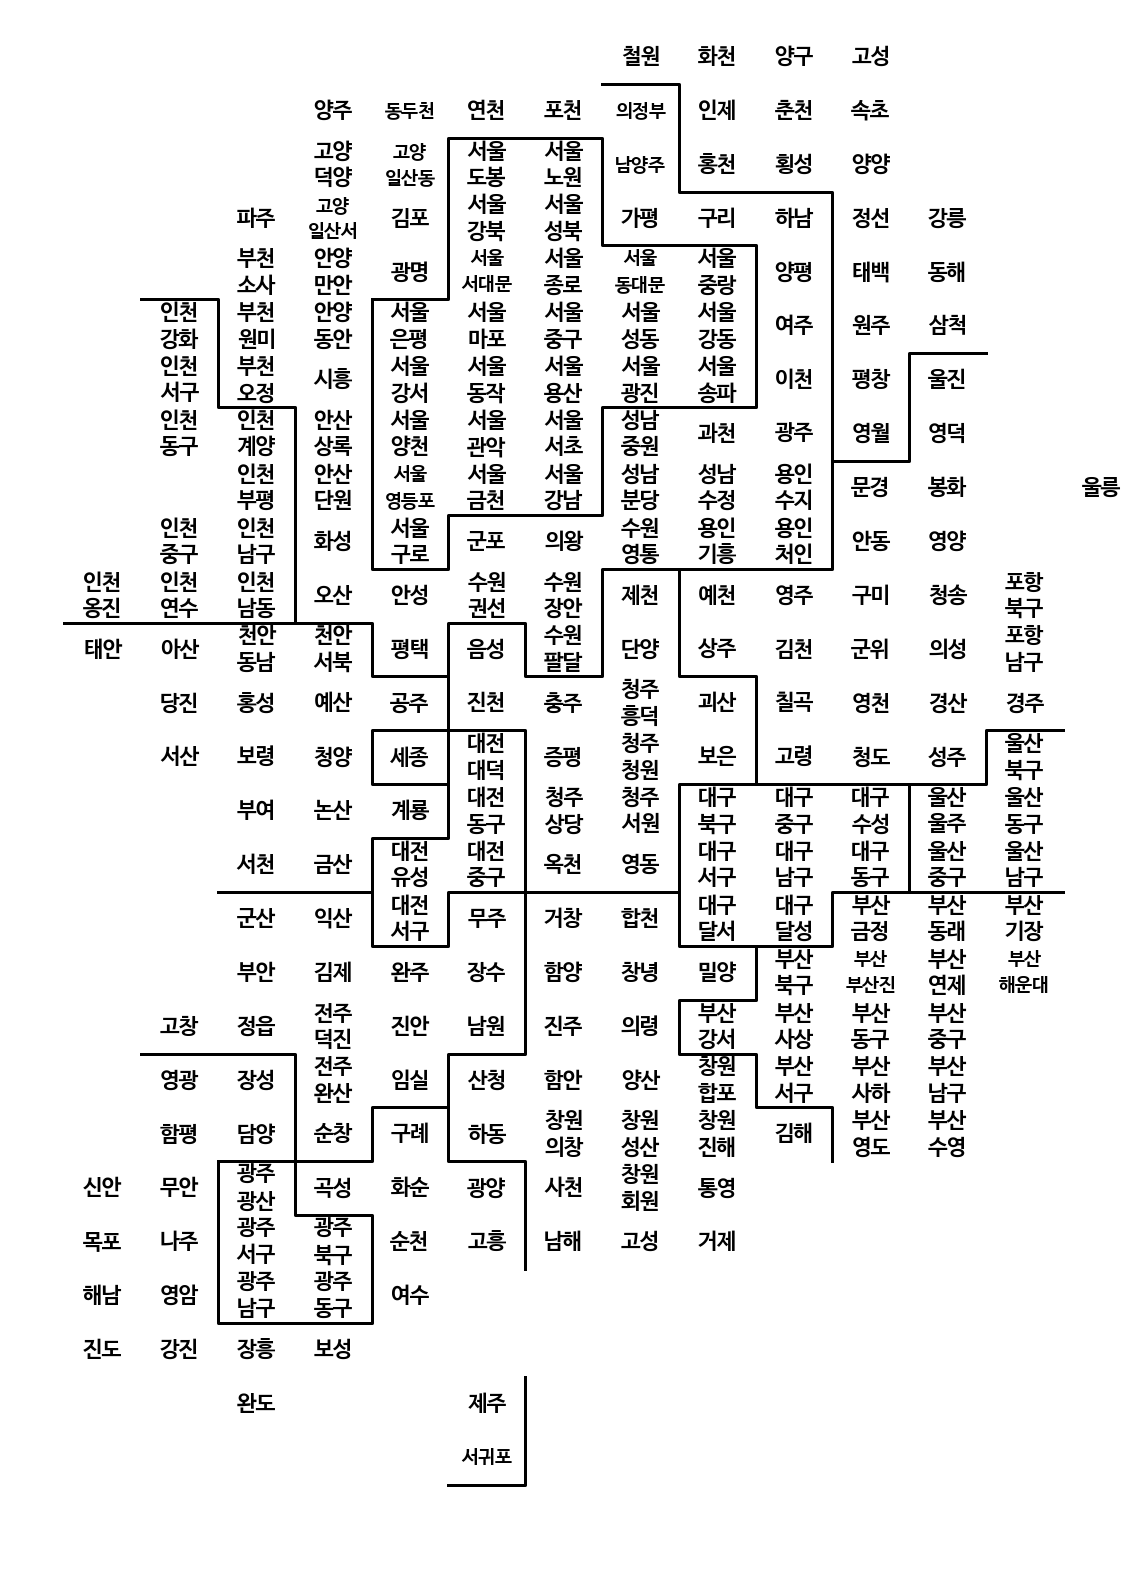

In [39]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

## 인구에 대한 분석 결과인 pop과 지도를 그리기 위한 draw_korea의 대이터를 합칠  
## 때 사용할 key인 ID 컬럼의 내용이 문제가 없는지 확인하자

In [40]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

## 위 결과에 따르면, pop에 행정구를 가진 시들의 데이터가 더 있다는 것을 알 수
## 있다. 어차피 지도에서는 표시되지 못하니 삭제한다.

In [41]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

pop.head()  

set()


,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


# 이제 pop과 draw_korea의 ID 컬럼이 일치했다고 보고, ID를 key로 merge를 시키도록 한다.

In [42]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


## 이제 위 pop 데이터에서 지도에 표현하고자 하는 데이터가 인구수합계라면 이 값들이 
##아까 만든 각 해당 행정구역에 위치하면 된다.

In [43]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [44]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, 446233.0, 292612.0, 348220.0, 567581.0, 662154.0,
         70076.0, 45991.0, 27218.0, --, --, --],
        [--, --, 430781.0, 300839.0, 363443.0, 327195.0, 450355.0,
         62448.0, 193763.0, 211101.0, 38718.0, 213846.0, --, --],
        [--, --, 283793.3333333333, 252353.0, 339484.0, 314194.0,
         152737.0, 355069.0, 411005.0, 111367.0, 47070.0, 93297.0, --,
         --],
        [--, 68010.0, 283793.3333333333, 345061.0, 491476.0, 379892.0,
         125249.0, 299259.0, 444168.0, 111563.0, 337979.0, 69599.0, --,
         --],
        [--, 510733.0, 283793.3333333333, 402888.0, 595485.0, 400997.0,
         230241.0, 357215.0, 657831.0, 210359.0, 43318.0, 51738.0, --,
         --],
        [--, 71014.0, 330284.0, 375857.0, 477739.0, 50

# 위 내용과 colormap을 완성하는 명령을 추가해서 함수로 만들자

In [0]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

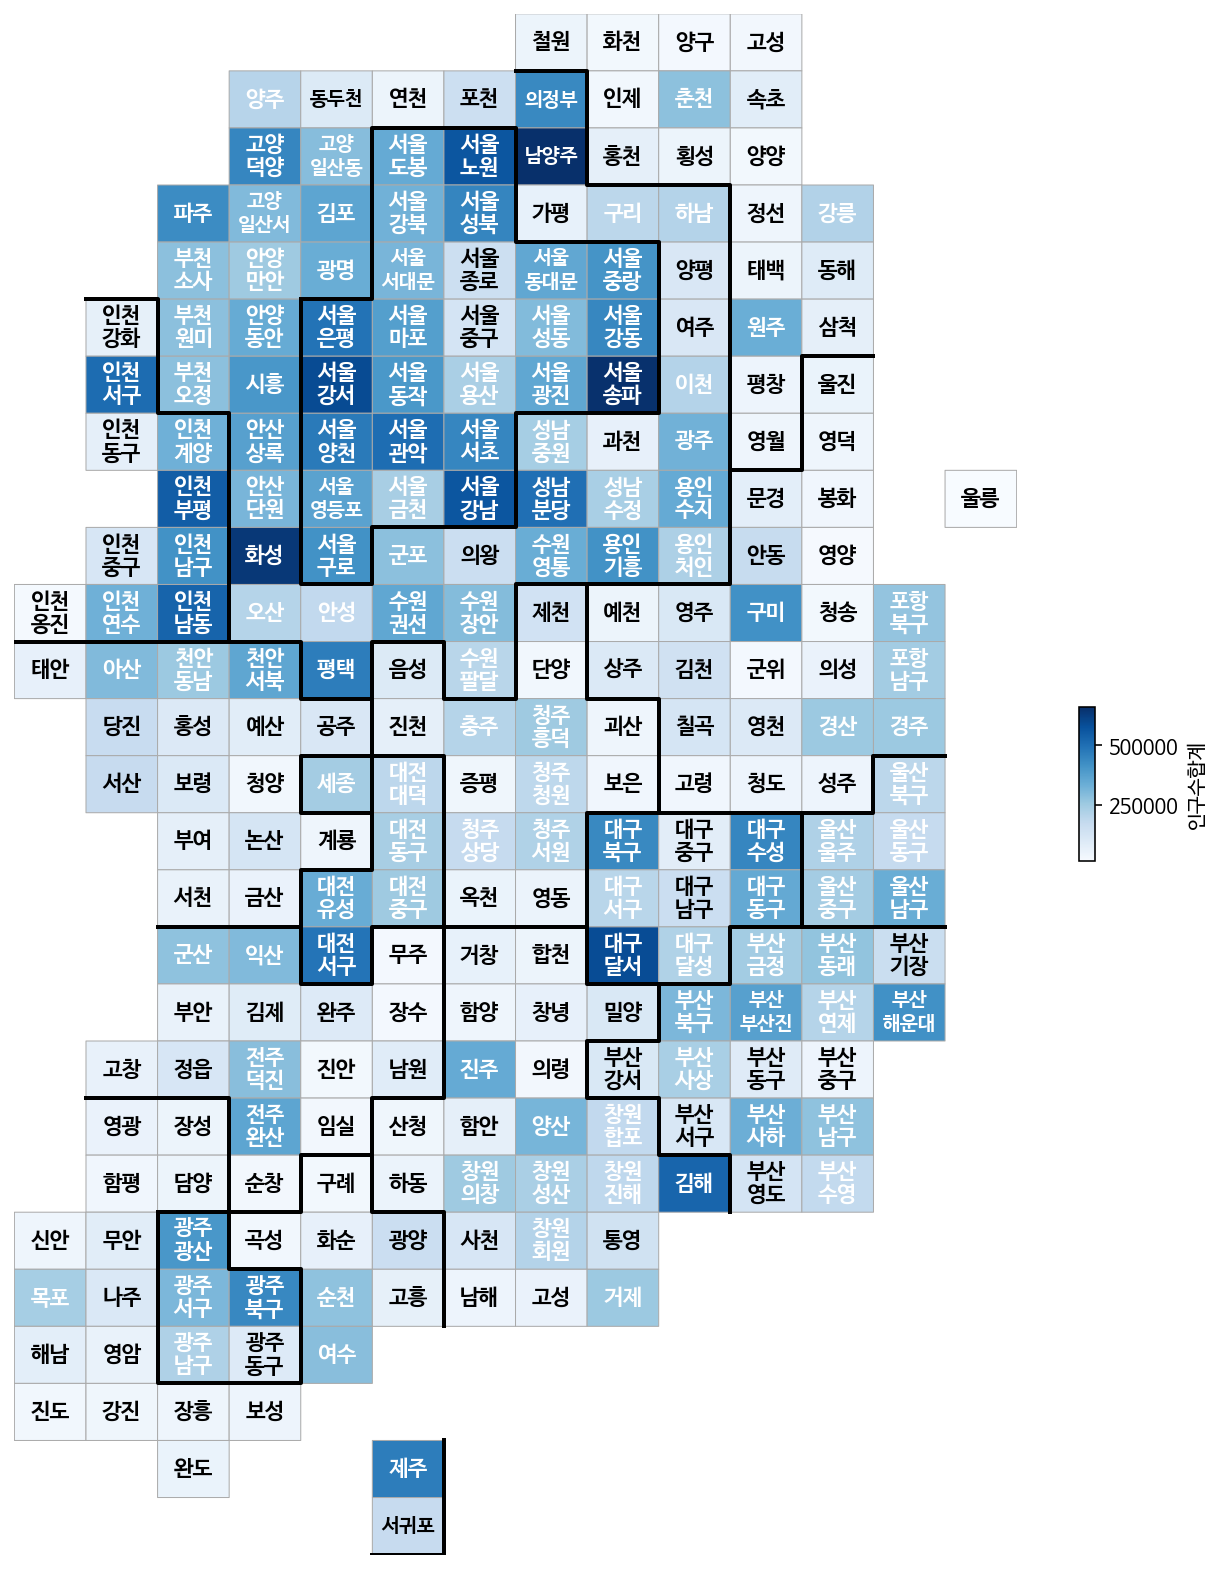

In [46]:
drawKorea('인구수합계', pop, 'Blues')

# 인구 소멸 위기 지역에 대한 표현

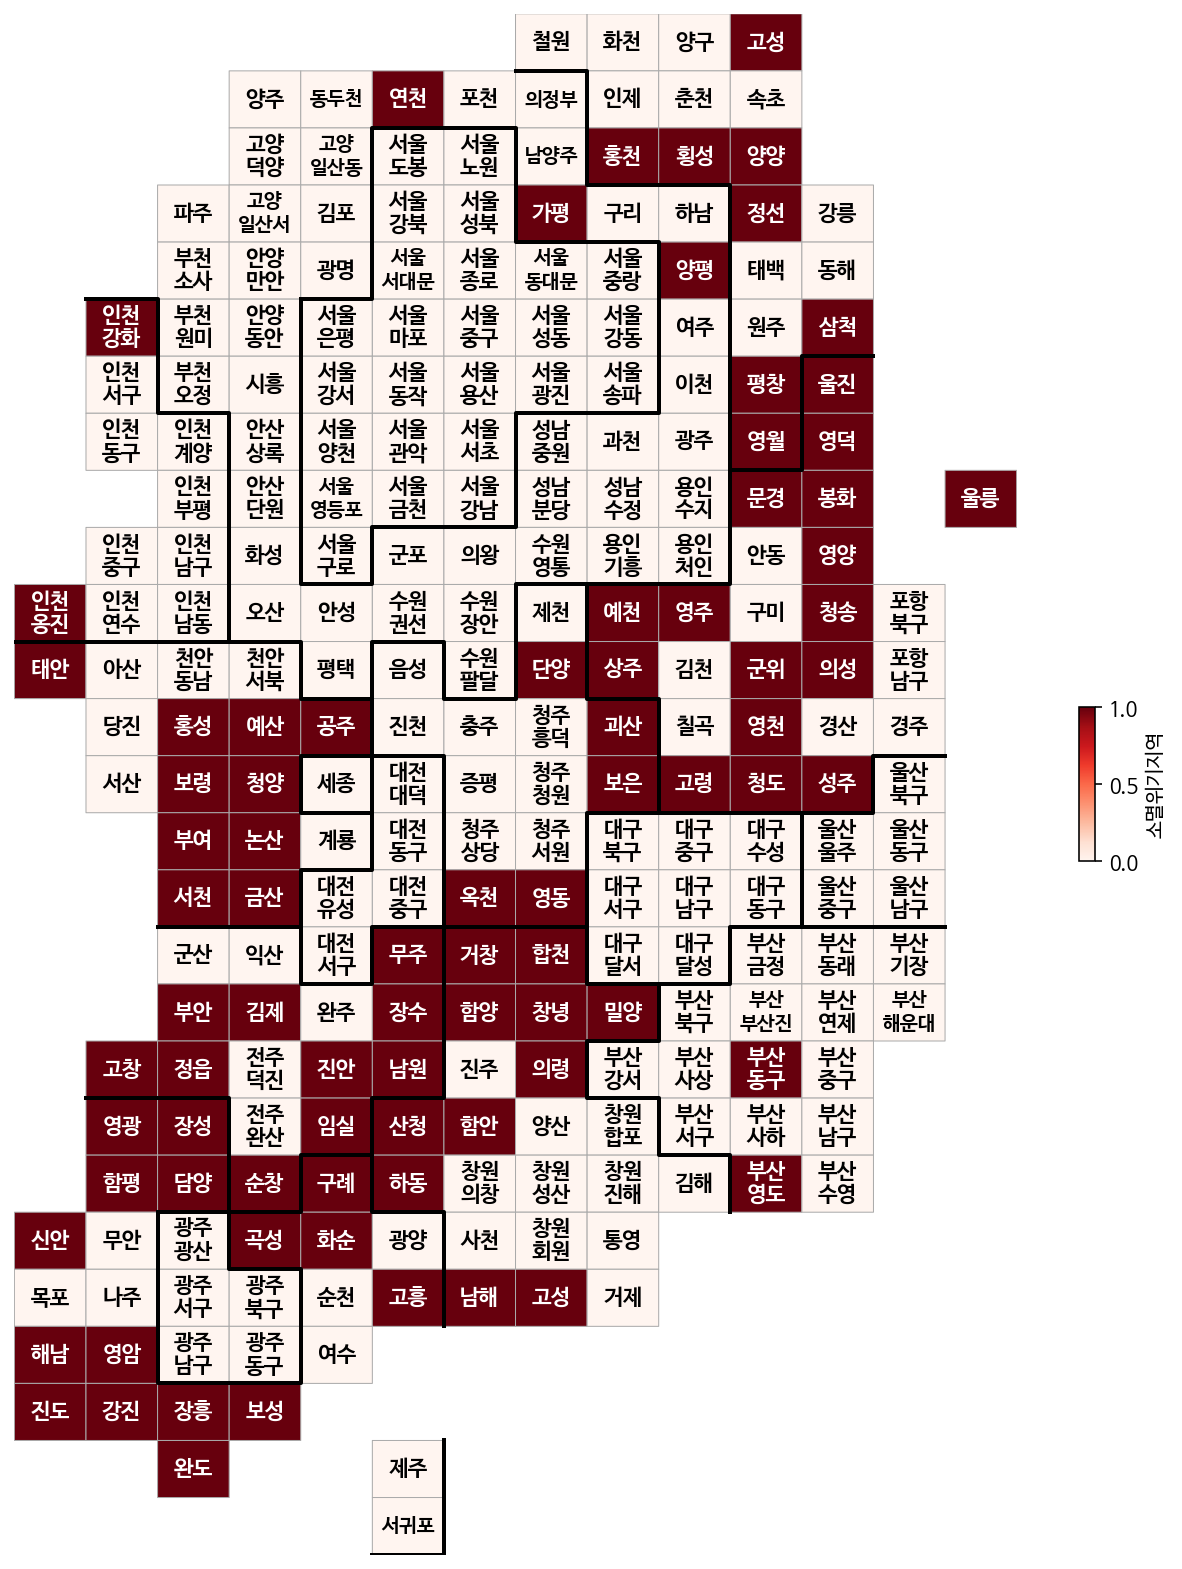

In [47]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

# 5-8. 인구 현황에서 여성 인구 비율 확인하기

In [0]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [49]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,속초,1,10


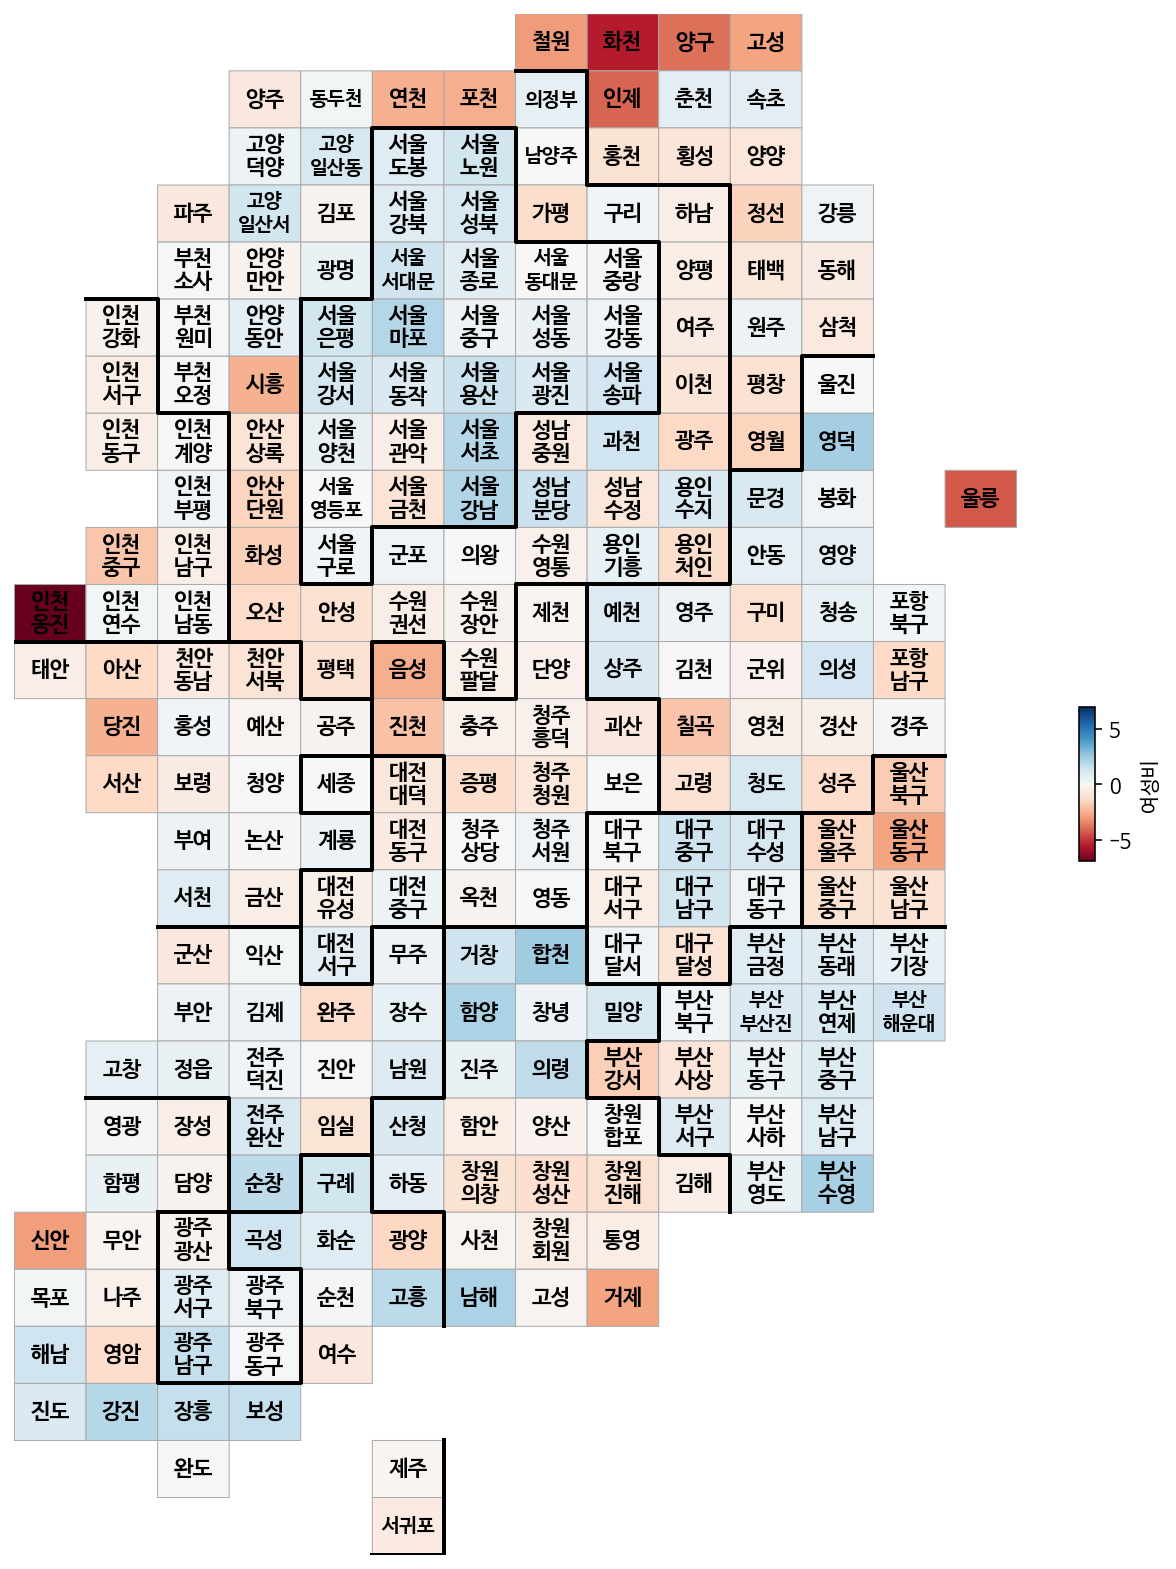

In [50]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

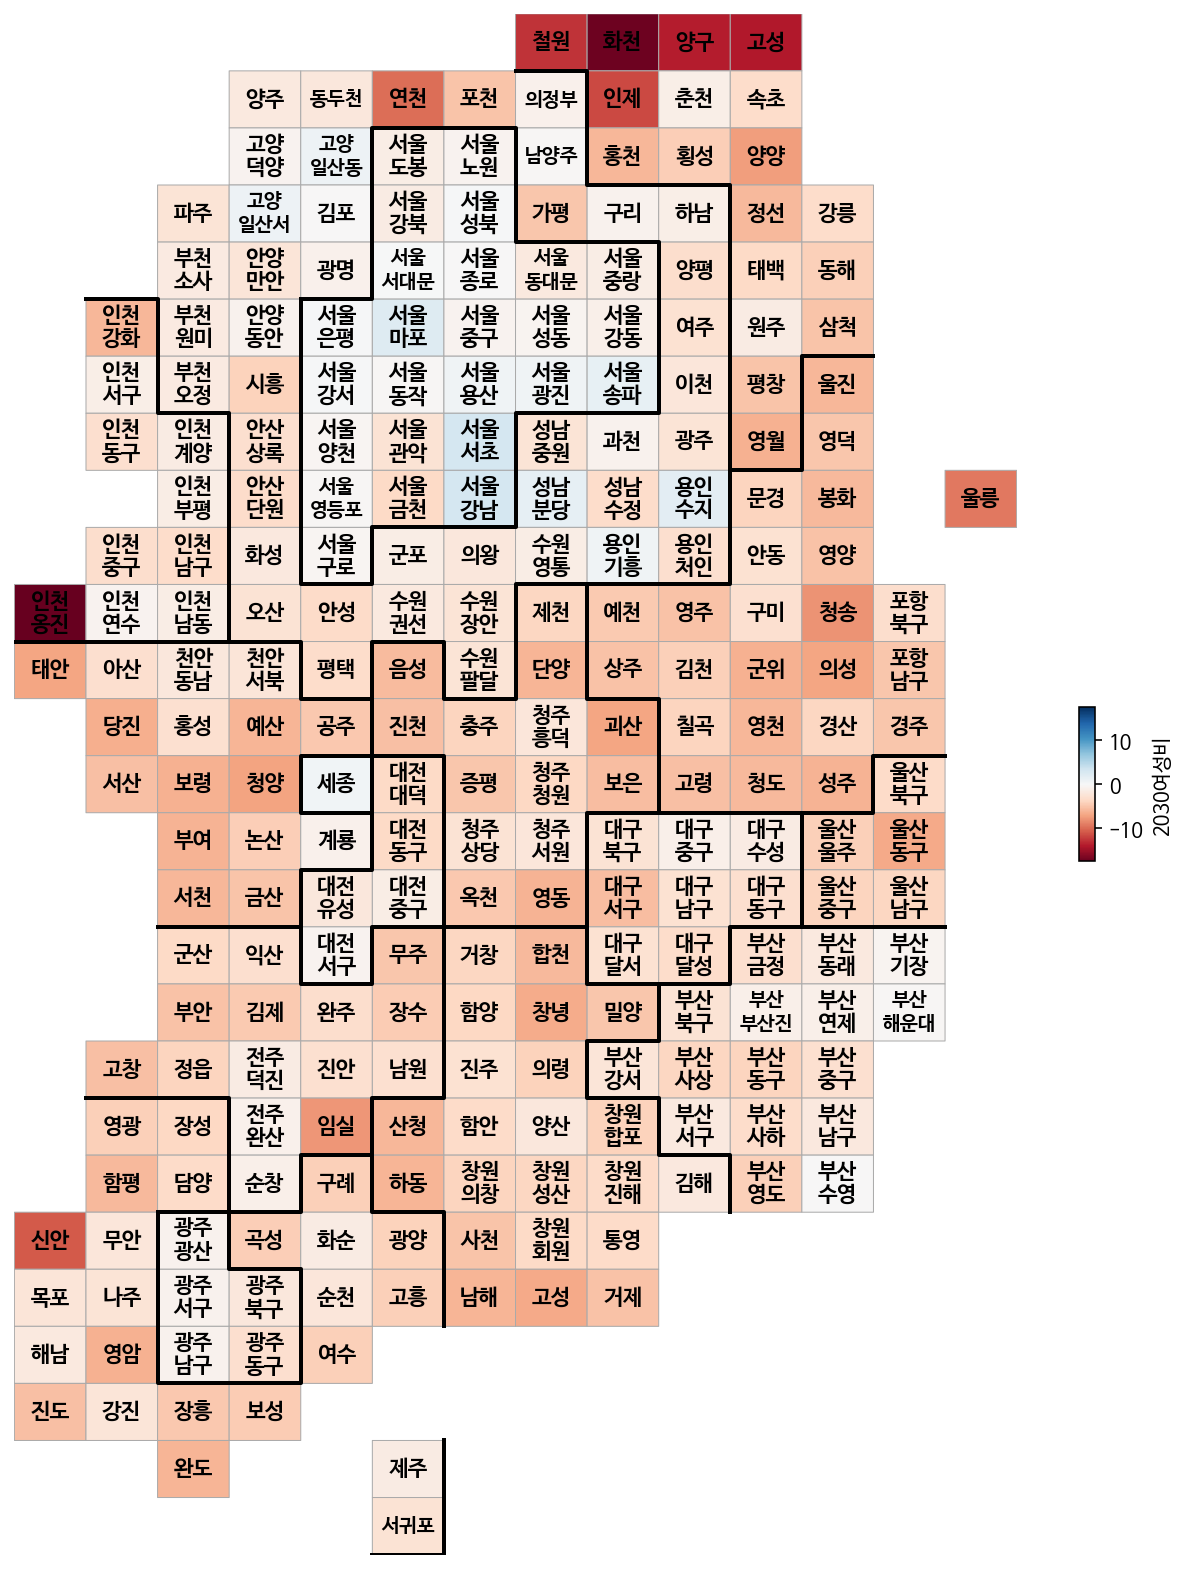

In [51]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

# 5-9. Folium에서 인구 소멸 위기 지역 표현하기

In [52]:
import folium
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [0]:
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
from google.colab import files
uploaded = files.upload()

Saving 05. skorea_municipalities_geo_simple.json to 05. skorea_municipalities_geo_simple.json


In [57]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id') # 지도 아이디

map

In [61]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id') # 지도 아이디

map

In [0]:
draw_korea.to_csv("05. draw_korea.csv", encoding='utf-8', sep=',')